# Max oven outgassing calculation

Perhaps the oven's flux is limited by outgassing.Theory here is taken from "An assessment of the evaporation and condensation phenomena of lithium during the operation of a Li(d,xn) fusion relevant neutron source"

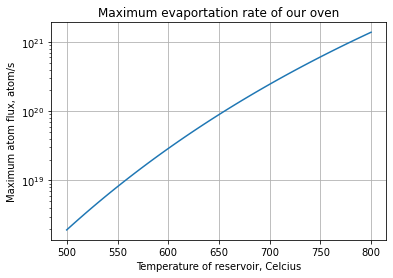

1.9293601479745923e+18

In [22]:
import numpy as np
import matplotlib.pyplot as plt

m=1.1623e-26 #kg
kb=1.3806e-23 #botlzman, SI

def pressure_ABC(T,A,B,C):
    return 10**(A-(B/(T+C)))
@np.vectorize
def pressure_NIST(T):
    #return pascal
    P1,P2=np.nan,np.nan
    if 298.14<=T<=1599.99:
        A,B,C=4.98831,7918.984,-9.52
        P1=pressure_ABC(T,A,B,C)
    if 1204<=T<=1353:
        A,B,C=1.58992,1603.966,-711.088
        P2=pressure_ABC(T,A,B,C)
    P_Bar=np.nanmean([P1,P2])  #these values agree
    assert np.isnan(P_Bar)==False
    P_Pa=100_000*P_Bar
    return P_Pa
def evaporation_Rate(T):
    #T: units of kelvin
    diam=10e-3
    A=np.pi*(diam/2)**2
    P=pressure_NIST(T) #pascal
    coefficient=1.66
    massFlowPerArea=coefficient*P*np.sqrt(m/(2*np.pi*kb*T))
    atomFlowPerArea=massFlowPerArea/m
    flux=atomFlowPerArea*A
    return flux

TArr=np.linspace(500,800)+273
rate=evaporation_Rate(TArr)
plt.semilogy(TArr-273.15,rate)
plt.grid()
plt.title("Maximum evaportation rate of our oven")
plt.xlabel("Temperature of reservoir, Celcius")
plt.ylabel("Maximum atom flux, atom/s")
plt.show()
evaporation_Rate(773)